In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['species']=encoder.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

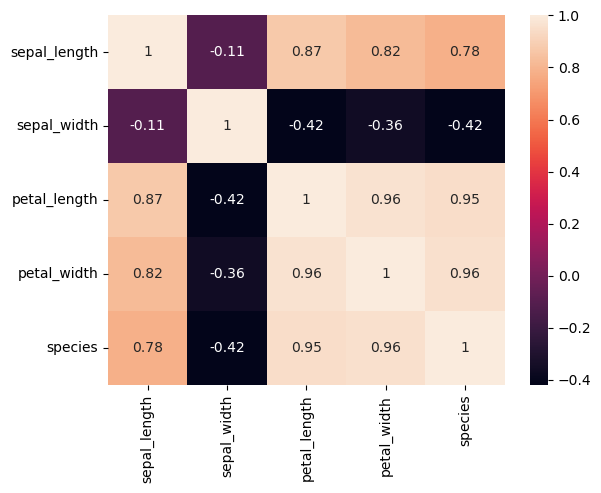

In [10]:
sns.heatmap(df.corr(),annot=True)

In [13]:
x=df.drop('species',axis=1)
y=df['species']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
y_pred=dt.predict(x_test)
y_pred

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0])

In [19]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      0.93      0.93        15
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [20]:
print(accuracy_score(y_test,y_pred))

0.9555555555555556


<Axes: >

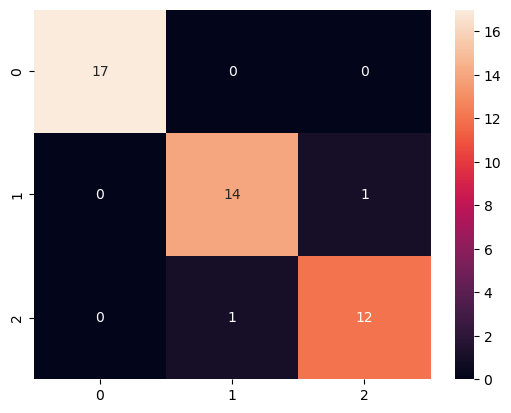

In [21]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [22]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

[Text(0.4, 0.9, 'petal_width <= 2.35\ngini = 0.666\nsamples = 105\nvalue = [33, 35, 37]\nclass = 2'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = 0'),
 Text(0.5, 0.7, 'petal_length <= 1.65\ngini = 0.5\nsamples = 72\nvalue = [0, 35, 37]\nclass = 2'),
 Text(0.2, 0.5, 'petal_width <= 4.95\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]\nclass = 1'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = 1'),
 Text(0.3, 0.3, 'petal_length <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = 2'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = 2'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 1'),
 Text(0.8, 0.5, 'petal_width <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]\nclass = 2'),
 Text(0.7, 0.3, 'sepal_width <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = 2'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = 2'),
 Text(0.8, 0.1, 'gini = 0.0\nsamp

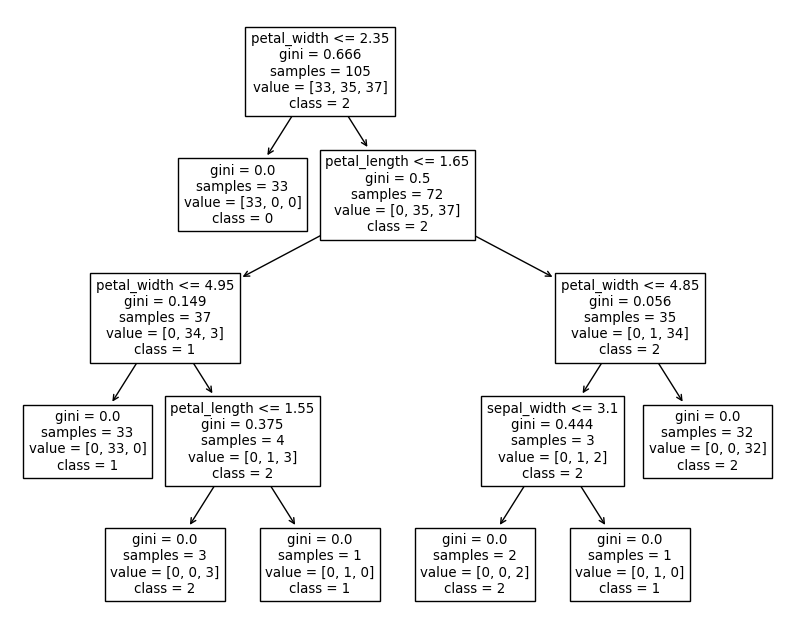

In [24]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(dt,feature_names=['sepal_length','sepal_width','petal_width','petal_length'],class_names=['0','1','2'])

In [32]:
from sklearn.model_selection import GridSearchCV
tree_para={'criterion':['gini','entropy'],'max_depth':list(range(1,6)),'min_samples_leaf':list(range(1,7))}
grid=GridSearchCV(DecisionTreeClassifier(random_state=2),tree_para,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6]})

In [35]:
list(range(1,6))

[1, 2, 3, 4, 5]